# Uncertainty Intervals (Khoảng không chắc chắn)

Theo mặc định, Prophet sẽ trả về các khoảng thời gian không chắc chắn cho `yhat` dự báo. Có một số giả định quan trọng đằng sau các khoảng không chắc chắn này.

Có ba nguồn không chắc chắn trong dự báo: sự không chắc chắn trong xu hướng, sự không chắc chắn trong ước tính thời vụ và quan sát nhiễu bổ sung.

## Uncertainty in the trend (Không chắc chắn trong xu hướng)

Nguồn không chắc chắn lớn nhất trong dự báo là khả năng thay đổi xu hướng trong tương lai. Chuỗi thời gian mà chúng ta đã thấy trong tài liệu này cho thấy những thay đổi xu hướng rõ ràng trong lịch sử. Prophet có thể phát hiện và fit với những điều này, nhưng chúng ta nên mong đợi những thay đổi xu hướng nào trong tương lai? Không thể biết chắc chắn, vì vậy chúng tôi làm điều hợp lý nhất có thể và chúng tôi cho rằng tương lai sẽ chứng kiến những thay đổi xu hướng tương tự như lịch sử. Cụ thể, chúng tôi giả định rằng tần suất và cường độ trung bình của các thay đổi xu hướng trong tương lai sẽ giống như những gì chúng tôi quan sát được trong lịch sử. Chúng tôi dự kiến những thay đổi xu hướng này về phía trước và bằng cách tính toán phân phối của chúng, chúng tôi thu được các khoảng không chắc chắn.

Một đặc điểm của cách đo lường độ không đảm bảo này là cho phép tỷ lệ linh hoạt cao hơn, bằng cách tăng `changepoint_prior_scale`, sẽ làm tăng độ không đảm bảo dự báo. Điều này là do nếu chúng ta lập mô hình nhiều thay đổi tốc độ hơn trong lịch sử thì chúng ta sẽ mong đợi nhiều hơn trong tương lai và làm cho các khoảng không chắc chắn trở thành một chỉ báo hữu ích về việc overfitting.

Độ rộng của khoảng không chắc chắn (theo mặc định là 80%) có thể được đặt bằng cách sử dụng tham số `interval_width`:

Trong python:

`forecast=Prophet(interval_width=0.95).fit(df).preidct(future)`

Một lần nữa, những khoảng thời gian này giả định rằng tương lai sẽ có cùng tần suất và cường độ thay đổi tỷ lệ như trong quá khứ. Giả định này có thể không đúng, vì vậy bạn không nên mong đợi có được phạm vi an toàn chính xác trên các khoảng thời gian không chắc chắn này.

## Uncertainty in seasonality (Sự không chắc chắn trong mùa vụ)

Theo mặc định, Prophet sẽ chỉ trả về sự không chắc chắn trong xu hướng và nhiễu quan sát. Để có được sự không chắc chắn về tính thời vụ, bạn phải thực hiện lấy mẫu Bayesian đầy đủ. Điều này được thực hiện bằng cách sử dụng tham số `mcmc.samples` (mặc định là 0). Chúng tôi làm điều này ở đây trong sáu tháng đầu tiên của dữ liệu Peyton Manning từ Quickstart:

In [4]:
import pandas as pd
from prophet import Prophet

df=pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')


In [8]:
df_1=df[(df['ds']>"2007-12-01")&(df['ds']<"2008-05-31")]
future=df[(df['ds']>"2007-12-01")&(df['ds']<"2008-08-31")]

In [9]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df_1, show_progress=False).predict(future)

15:19:42 - cmdstanpy - INFO - CmdStan installation D:\App\anaconda3\envs\py310\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
15:19:42 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
15:19:42 - cmdstanpy - INFO - CmdStan start processing
15:19:42 - cmdstanpy - INFO - Chain [1] start processing
15:19:42 - cmdstanpy - INFO - Chain [2] start processing
15:19:42 - cmdstanpy - INFO - Chain [3] start processing
15:19:42 - cmdstanpy - INFO - Chain [4] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] done processing
15:19:49 - cmdstanpy - INFO - Chain [2] done processing
15:19:50 - cmdstanpy - INFO - Chain [3] done processing
15:19:50 - cmdstanpy - INFO - Chain [4] done processing
15:19:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Excep

Điều này thay thế ước tính MAP điển hình bằng lấy mẫu MCMC và có thể mất nhiều thời gian hơn tùy thuộc vào số lượng quan sát có - dự kiến vài phút thay vì vài giây. Nếu bạn thực hiện lấy mẫu đầy đủ, thì bạn sẽ thấy sự không chắc chắn trong các thành phần theo mùa khi bạn vẽ chúng:

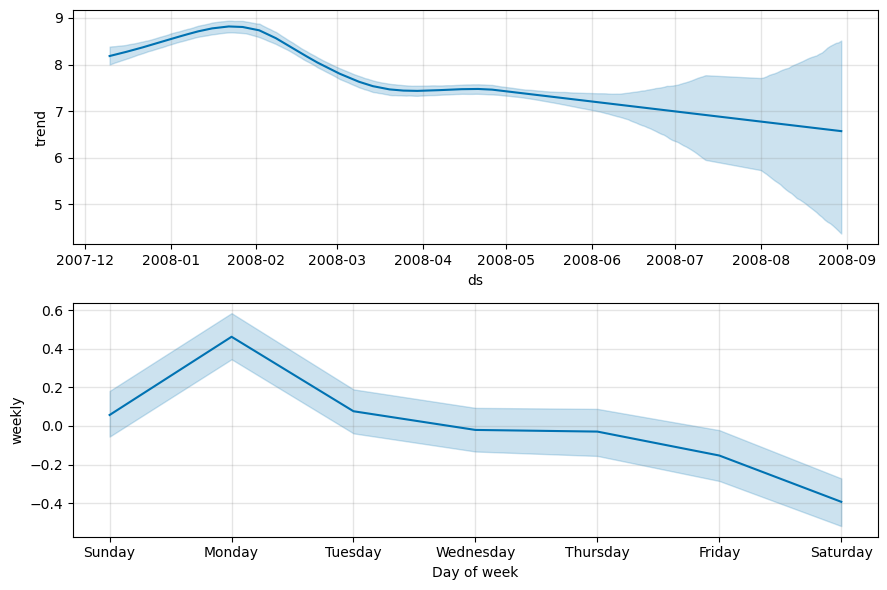

In [10]:
fig = m.plot_components(forecast)

Bạn có thể truy cập các mẫu dự đoán thô sau trong Python bằng phương thức `m.predictive_samples(future)` hoặc trong R bằng cách sử dụng hàm` predictive_samples(m, future)`.